## SMS Spam Classifier: Multinomial Naive Bayes

The notebook is divided into the following sections:
1. Importing and preprocessing data
2. Building the model: Multinomial Naive Bayes
    - Model building 
    - Model evaluation

In [64]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_auc_score, auc
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
sms_df = pd.read_table('SMSSpamCollection', header=None, names=['Class', 'sms'])
sms_df.head()

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [4]:
len(sms_df)

5572

In [5]:
ham_spam = sms_df.Class.value_counts()
ham_spam

ham     4825
spam     747
Name: Class, dtype: int64

In [6]:
print('Spam percentage: ', round(100*(ham_spam[1] / len(sms_df)), 2))

Spam percentage:  13.41


In [10]:
sms_df['label'] = sms_df.Class.map({'ham': 0, 'spam': 1})

In [11]:
sms_df.head()

,Class,sms,label
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives around here though",0


In [12]:
X = sms_df.sms
y = sms_df.label

In [18]:
print( X.shape)

(5572,)


In [20]:
print( y.shape)

(5572,)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.70, random_state=1)

In [25]:
X_train.head()

4393                                                                                                    what are your new years plans?
216                                                                         Finally the match heading towards draw as your prediction.
4471                                 Lemme know when I can swing by and pick up, I'm free basically any time after 1 all this semester
3889                                                                                                ok....take care.umma to you too...
5030    I'd like to tell you my deepest darkest fantasies. Call me 09094646631 just 60p/min. To stop texts call 08712460324 (nat rate)
Name: sms, dtype: object

In [26]:
X_test.head()

1078                                                                                   Yep, by the pretty sculpture
4028                                                                  Yes, princess. Are you going to make me moan?
958                                                                                      Welp apparently he retired
4642                                                                                                        Havent.
4674    I forgot 2 ask ü all smth.. There's a card on da present lei... How? Ü all want 2 write smth or sign on it?
Name: sms, dtype: object

In [27]:
y_train.head()

4393    0
216     0
4471    0
3889    0
5030    1
Name: Class, dtype: int64

In [28]:
y_test.head()

1078    0
4028    0
958     0
4642    0
4674    0
Name: Class, dtype: int64

In [33]:
vec = CountVectorizer(stop_words='english')

In [34]:
vec.fit(X_train)

CountVectorizer(stop_words='english')

In [35]:
vec.get_feature_names_out()

array(['00', '000', '008704050406', ..., 'zyada', 'èn', '〨ud'],
      dtype=object)

In [36]:
vec.vocabulary_

{'new': 4272,
 'years': 6855,
 'plans': 4682,
 'finally': 2550,
 'match': 3930,
 'heading': 3018,
 'draw': 2202,
 'prediction': 4801,
 'lemme': 3650,
 'know': 3548,
 'swing': 5957,
 'pick': 4644,
 'free': 2663,
 'basically': 1119,
 'time': 6163,
 'semester': 5369,
 'ok': 4406,
 'care': 1485,
 'umma': 6353,
 'like': 3685,
 'tell': 6043,
 'deepest': 2000,
 'darkest': 1949,
 'fantasies': 2478,
 '09094646631': 222,
 'just': 3472,
 '60p': 538,
 'min': 4022,
 'stop': 5804,
 'texts': 6083,
 '08712460324': 103,
 'nat': 4218,
 'rate': 4985,
 'lmao': 3732,
 'fish': 2566,
 'memory': 3984,
 'need': 4243,
 'yahoo': 6841,
 'boys': 1324,
 'bring': 1354,
 'perf': 4592,
 'legal': 3644,
 'hiya': 3083,
 'comin': 1722,
 'bristol': 1358,
 'st': 5740,
 'week': 6637,
 'april': 940,
 'les': 3656,
 'got': 2862,
 'rudi': 5234,
 'yrs': 6882,
 'eve': 2383,
 'snoring': 5603,
 'drunk': 2226,
 'bak': 1092,
 'college': 1710,
 'work': 6769,
 'sends': 5374,
 'ink': 3289,
 'bath': 1123,
 'wamma': 6574,
 'laid': 3581,
 '

In [38]:
len(vec.vocabulary_.keys())

6904

In [39]:
X_train_transformed = vec.transform(X_train)
X_test_transformed = vec.transform(X_test)

In [40]:
print(type(X_train_transformed))

<class 'scipy.sparse._csr.csr_matrix'>


In [41]:
print(X_test_transformed)

  (0, 4827)	1
  (0, 6861)	1
  (1, 2834)	1
  (1, 3881)	1
  (1, 4078)	1
  (1, 4837)	1
  (1, 6863)	1
  (2, 922)	1
  (2, 6653)	1
  (3, 3009)	1
  (4, 991)	1
  (4, 1481)	1
  (4, 1929)	1
  (4, 2635)	1
  (4, 3648)	1
  (4, 4817)	1
  (4, 5497)	1
  (4, 5594)	2
  (4, 6580)	1
  (4, 6798)	1
  (5, 1717)	1
  (5, 2862)	1
  (5, 4406)	1
  (5, 6124)	1
  (5, 6575)	1
  :	:
  (1664, 6580)	1
  (1665, 4827)	1
  (1665, 4922)	1
  (1665, 6580)	1
  (1666, 3107)	1
  (1666, 6612)	1
  (1667, 42)	1
  (1667, 1864)	1
  (1667, 2663)	1
  (1667, 3045)	1
  (1667, 3736)	1
  (1667, 5065)	1
  (1667, 6074)	1
  (1668, 794)	1
  (1668, 1717)	2
  (1668, 3240)	1
  (1668, 3658)	1
  (1668, 4644)	1
  (1668, 6414)	1
  (1669, 4354)	1
  (1670, 4407)	1
  (1670, 6088)	1
  (1671, 3608)	1
  (1671, 3729)	1
  (1671, 5649)	1


###  Model training

In [46]:
mnb = MultinomialNB()

mnb.fit(X_train_transformed, y_train)

pred_y_class = mnb.predict(X_test_transformed)

pred_y_prob = mnb.predict_proba(X_test_transformed)

In [50]:
mnb.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn'}

In [54]:
metrics.accuracy_score(y_test, pred_y_class)

0.986244019138756

In [55]:
metrics.confusion_matrix(y_test, pred_y_class)

array([[1434,    8],
       [  15,  215]])

In [56]:
confusion = metrics.confusion_matrix(y_test, pred_y_class)
print(confusion)
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

[[1434    8]
 [  15  215]]


In [57]:
sensitivity = TP / float(TP + FN)
print(sensitivity)

0.9347826086956522


In [58]:
specificity = TN / float(TN + FP)
print(specificity)

0.9944521497919556


In [60]:
precision = TP / float(TP + FP)
print(precision)

0.9641255605381166


In [61]:
recall = TP / float(TP + FN)
print(recall)

0.9347826086956522


In [62]:
print('Precision score: ', metrics.precision_score(y_test, pred_y_class))
print('recall score: ', metrics.recall_score(y_test, pred_y_class))
print('f1 scode: ', metrics.f1_score(y_test, pred_y_class))

Precision score:  0.9641255605381166
recall score:  0.9347826086956522
f1 scode:  0.9492273730684327


In [69]:
print(pred_y_prob[:,1])

[5.04100100e-03 1.45932813e-04 9.20076203e-02 ... 5.74606060e-02
 8.81500189e-03 9.92429553e-06]


In [77]:
false_positive_rate, true_positive_rate ,threshold = metrics.roc_curve(y_test, pred_y_prob[:,1])


In [78]:
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.9919646626062835


In [80]:
pd.DataFrame({'TRP': true_positive_rate,
             'FPR': false_positive_rate,
             'threshold': threshold})

,TRP,FPR,threshold
0,0.000000,0.000000,inf
1,0.278261,0.000000,1.000000e+00
2,0.295652,0.000000,1.000000e+00
3,0.304348,0.000000,1.000000e+00
4,0.308696,0.000000,1.000000e+00
...,...,...,...
152,1.000000,0.958391,1.120707e-12
153,1.000000,0.968100,8.802916e-14
154,1.000000,0.969487,8.621377e-14
155,1.000000,0.971567,8.024988e-14


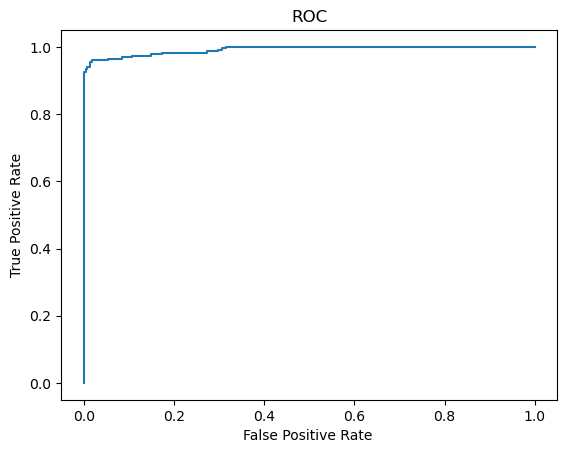

In [81]:
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate,true_positive_rate)

## In this specific case, we are more interested in high specificity 

### Specificity implies that out of all the genuine SMS's, how many of them were correctly predicted as legitimate by the model.